# Principal Component Analysis (PCA)
* PCA is a well-known algorith for Dimensionality Reduction
* PCA:
    - reduces the number of feautres while keeping the feature information
    - PCA is a mathematical technique to reduce redundancy in the data
    - removes correlations among features
    - emphasizes variation of strong features, making the data easier to visualize

Review Matrix multiplication:
    * Matrix  A = ([2, 0], [1,5]) and vector v = np.array([3,4])
    * np.dot(A,v)

In [5]:
import numpy as np

A = ([2, 0], [1,5])
v = np.array([3,4])

np.dot(A,v)   

array([ 6, 23])

In [4]:
np.dot(v,A)

array([10, 20])

EigenValue and Eigenvector of Matrix

A matrix's eigenvalues and eigenvectors are what we will use for the scalar value(a) and vector(v) respectively

* Eigenvecotr(v) i a vector whose direction remains unchanged when a linear tranformation is applied to it. They represent the rotation matrix.
* Eigenvalues(a) represents the scalar value that is used such that when multiplied by v, gives the same value as Av

For a given matrix A, we want to obtain a vector v and a scalar a value such that:

Av = av

### Write a python function to obtain vector(v) and scalar(a) for a given matrix A
hints:
1. Before we find the vector and scalar, we need the eigenvalye and eigenvector of A. Give the same matrix A, we used above, see how numpys linalg.eig method could help you solve this
2. To check your answer, mulitply A by of its vectors, adn then multiply a by the same vector and see if you get the same outcome

In [9]:
eig_value, eig_vector = np.linalg.eig(A)

print(eig_value)
print(eig_vector)

[5. 2.]
[[ 0.          0.9486833 ]
 [ 1.         -0.31622777]]


## Check that Av = av

In [14]:
# muplitply A with its first eigen-vector
np.dot(A, eig_vector[::1])

array([[ 0.        ,  1.8973666 ],
       [ 5.        , -0.63245553]])

In [12]:
# mupltiply A with its second eigen-vector
np.dot(A, eig_vector[::2])

ValueError: shapes (2,2) and (1,2) not aligned: 2 (dim 1) != 1 (dim 0)

In [11]:
# multiply the other eigen-value of A with its associaed eigen-vector
eig_value[1]*eig_vector[:, 1]

array([ 1.8973666 , -0.63245553])

# Question: Which country is different from the others?

https://setosa.io/ev/principal-component-analysis/

In [30]:
import numpy as np 
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt


# use pandas to read csv in the excel spreadsheet
df = pd.read_excel('pca_uk.xlsx')

# build a matrix for the feature values, not including the text labels
X = np.array([df[i].values for i in df.columns if i != 'Features'])

# print(X)

# Calculate the PCA
pca = PCA(n_components=2)

# Find the principle components of 17 features
X_r = pca.fit_transform(X)

print(X_r)

[[-144.99315218   -2.53299944]
 [ 477.39163882  -58.90186182]
 [ -91.869339    286.08178613]
 [-240.52914764 -224.64692488]]


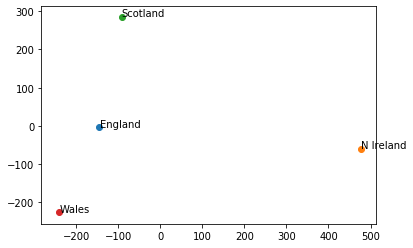

In [34]:
# Let's visualize the principle component

for feature, (plot_x, plot_y) in enumerate(zip(X_r[:, 0], X_r[:,1])):
    plt.scatter(plot_x, plot_y)
    plt.text(plot_x+0.3, plot_y+0.3, df.columns[:-1][feature])

    
plt.show()

How much of the information in the original dataset is preserved in the principle components?
* Hint: use pca.explained_variance_ratio_

In [38]:
# PCA computation by sklearn

pca = PCA(n_components = 2)
X_r = pca.fit_transform(X)

print(X_r)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())   # we find that 96% of the information is preserved

[[-144.99315218   -2.53299944]
 [ 477.39163882  -58.90186182]
 [ -91.869339    286.08178613]
 [-240.52914764 -224.64692488]]
[105073.34576714  45261.62487597]
[0.67444346 0.29052475]
[0.67444346 0.96496821]


# How to calculate the correlation of the principle components:

In [43]:
import scipy.stats

print("Correlation of PCA Components:")
print(scipy.stats.pearsonr(X_r[:, 0], X_r[:, 1]))

Correlation of PCA Components:
(-2.7755575615628914e-17, 1.0)


### Activity(Reminder): Reverse the elements of a list

In [51]:
list = [1, 2, 3]

print(list[::-1])

[3, 2, 1]


In [49]:
def reverse_f(ls):
    N = len(ls)
    reverse_ls = []
    
    for i in range(N):
        reverse_ls.append(ls[N - (i + 1)])
    return reverse_ls

reverse_f([1, 2, 3])

[3, 2, 1]

## Activity: PCA Steps

Follow the steps here and write a function that computes the principle component for iris dataset 

https://sebastianraschka.com/Articles/2014_pca_step_by_step.html

Steps: 

1- Subtract column mean from feature matrix

2- Calculate the covariance of centered matrix

3- Calculate the eigenvalue and eigenvector of covariance matrix

4- Return the first K (two for example) column of matrix multiplication of centerned matrix with eigenvector matrix


Compare the result of custom function with PCA in sklearn

Calculate the correlation of the first two principle component 

How much of the dataset information is preserved in the first two components?

Hint: use `pca.explained_variance_ratio_`

1- Use the following matrix: X = np.array([[1, 1, 1], [1, 2, 1], [1, 3, 2], [1, 4, 3]])

2- Subtract the column mean from the feature matrix -> this new matrix will be our centered matrix

3- Calculate the covariance of the centered matrix (check out numpy's resources to see if there's a function that can do this for you: np.cov())

4- calculate the eigenvalue and eigenvector of the covariance matrix. Remember how we did this in the previous activity. 

5- Sort the eigenvalues so that they are in decreasing order, and then find the top N (for example, 2) eigenvectors

6- Dot multiply the centered matrix with the top N eigenvectors of the covariance matrix

7- Compare the result with the function with PCA in sklearn

In [75]:
from sklearn.decomposition import PCA
import scipy
import numpy as np


X = np.array([[1, 1, 1], [1, 2, 1], [1, 3, 2], [1, 4, 3]])
print(X)

# PCA Computation by Function
def PCA_calculation(data, n_comp=2):
    
    x_bar = np.mean(data, axis=0)
    
    # 2- Subtract the column mean from the feature matrix -> this new matrix will be our centered matrix
    centered = data - x_bar
    
    # 3- Calculate the covariance of the centered matrix
    covariance = np.cov(centered.T)     # .T = transpose -> the rows of the original data are now the columns
    
    # 4- calculate the eigenvalue and eigenvector of the covariance matrix
    eig_value, eig_vector = np.linalg.eig(covariance)
    
    # 5- Sort the eigenvalues so that they are in decreasing order, and then find the top N (for example, 2) eigenvectors
    idx = np.argsort(eig_value)[::-1]
    idx_n_comp = idx[:n_comp]
    
    # eigenvector according to top n_comp largest
    eig_vector = eig_vector[:, idx_n_comp]
    
    # 6- Dot multiply the centered matrix with the top N eigenvectors of the covariance matrix
    pca = np.dot(covariance, eig_vector)
    return pca


PCA_calculation(X, 2)

[[1 1 1]
 [1 2 1]
 [1 3 2]
 [1 4 3]]


array([[ 0.        ,  0.        ],
       [-2.03405201,  0.03900378],
       [-1.48274273, -0.05350605]])

In [76]:
# PCA Computation by Sklearn

X = np.array([[1, 1, 1], [1, 2, 1], [1, 3, 2], [1, 4, 3]])

pca = PCA(n_components=2)
X_r = pca.fit_transform(X)
print(X_r)

print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

print('Correlation of PCA Component:')
print(scipy.stats.pearsonr(X_r[:, 0], X_r[:, 1]))

[[-1.65392786 -0.2775295 ]
 [-0.84584087  0.31153366]
 [ 0.55130929  0.09250983]
 [ 1.94845944 -0.126514  ]]
[2.5171201  0.06621324]
[0.97436907 0.02563093]
[0.97436907 1.        ]
Correlation of PCA Component:
(3.0531133177191805e-16, 0.9999999999999997)


### Activity: Apply Principle to Boston Housing Features and then train the linear regression model

* Basically, we remove correlation among features with PCA

* Steps for doing PCA with Linear Regression for Boston Housing:

    1- split dataset: create X_train, y_train, X_test, and y_test
    
    2- Apply PCA on X_train and obtain the required number of principle components
    
    3-  `pca = PCA(n_components=2)`
    
        - `X_train_reduced = pca.fit_transform(X_train)`
        
    4- Apply data normalization for `X_train_reduced` --> name it as `X_train_reduced_scaled`
    
    5- Fit the model `lr.fit(X_train_reduced_scaled)`
    
    6- Pass `X_test_reduced = pca.transform(X_test)` --> then obtain `X_test_reduced_scaled`
    
    7- Pass `X_test_reduced_scaled` into `lr.predict(X_test_reduced_scaled)`
    
https://ostwalprasad.github.io/machine-learning/PCA-using-python.html

In [80]:
# Boston Housing Data
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# load the data
boston = load_boston()

bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos['PRICE'] = boston.target

# print(bos.head())

print(pca.explained_variance_ratio_.cumsum())

[0.80457219 0.96727776 0.98868609]


In [95]:
col_features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
X = bos[col_features]
y = bos.PRICE


# 1- split dataset: create X_train, y_train, X_test, and y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0) 


# 2- Apply PCA on X_train and obtain the required number of principle components
pca = PCA(n_components = 2)
X_r = pca.fit_transform(X_train)

X_train_reduced = pca.fit_transform(X_train)

In [96]:
bos_reg = LinearRegression()

bos_reg.fit(X_r, y_train)

# 4- Apply data normalization for X_train_reduced --> name it as X_train_reduced_scaled
X_train_reduced_scaled = (X_train_reduced)